#**Exploring UK Vaccination Data**




## **0) Data upload and package imports.**

In [ ]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [ ]:
pd = pd.read_excel("UK_VaccinationsData.xlsx");

## **1) Pre-processing exploration**


### **1.1) Generate descriptive statistics & comment on the main trends of the data.**

In [ ]:
pd.head(3)

,areaName,areaCode,year,month,Quarter,day,WorkingDay,FirstDose,SecondDose,ThirdDose
0,England,E92000001,2022.0,5,Q2,Mon,Yes,3034.0,3857.0,8747.0
1,England,E92000001,2022.0,5,Q2,Sun,No,5331.0,3330.0,4767.0
2,England,E92000001,2022.0,5,Q2,Sat,No,13852.0,9759.0,12335.0


In [ ]:
pd.describe()

,year,month,FirstDose,SecondDose,ThirdDose
count,903.000000,904.000000,900.000000,901.000000,898.000000
mean,2021.625692,5.946903,4994.323333,5574.125416,42529.570156
std,0.484212,4.146467,9651.335670,9174.101390,104877.579915
min,2021.000000,1.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,338.500000,478.000000,1313.500000
50%,2022.000000,4.000000,876.500000,971.000000,6992.000000
75%,2022.000000,11.000000,3653.250000,5770.000000,23464.750000
max,2022.000000,12.000000,115551.000000,48491.000000,830403.000000


##**2) Data Pre-Processing.**

### **2.1) checking data types and null values.**

In [ ]:
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areaName    904 non-null    object 
 1   areaCode    904 non-null    object 
 2   year        903 non-null    float64
 3   month       904 non-null    int64  
 4   Quarter     903 non-null    object 
 5   day         903 non-null    object 
 6   WorkingDay  902 non-null    object 
 7   FirstDose   900 non-null    float64
 8   SecondDose  901 non-null    float64
 9   ThirdDose   898 non-null    float64
dtypes: float64(4), int64(1), object(5)
memory usage: 70.8+ KB


In [ ]:
pd.dtypes

areaName       object
areaCode       object
year          float64
month           int64
Quarter        object
day            object
WorkingDay     object
FirstDose     float64
SecondDose    float64
ThirdDose     float64
dtype: object

### **2.2.) Checking for missing values.**



checking which columns contain missing values & checking appropriate naming is used

In [ ]:
pd.isnull().any()

areaName      False
areaCode      False
year           True
month         False
Quarter        True
day            True
WorkingDay     True
FirstDose      True
SecondDose     True
ThirdDose      True
dtype: bool

total number of missing cells

In [ ]:
pd.isnull().sum().sum()
#np.count_nonzero(vd.isnull())

18

total number of rows with missing values

In [ ]:
sum(map(any, pd.isnull()))

10

since this number is low in comparison to the total number of rows. our analysis wont be affected by removing these rows. hence we will drop them.

In [ ]:
pd1 = pd.dropna(axis ='index', how = 'any')

In [ ]:
pd1.isnull().sum().sum()

0

## **3) Visualising the data.**

### **3.1) Visualising the distribution of one or more individual continuous variables**

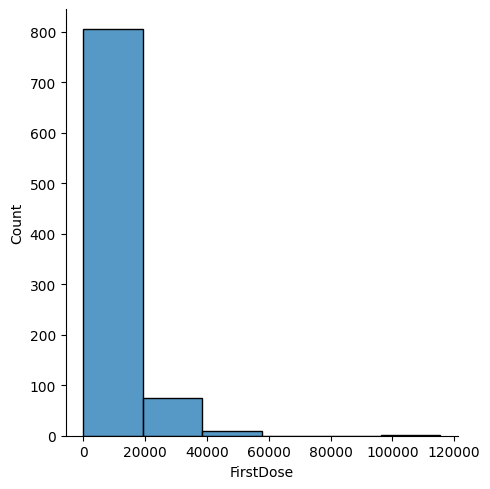

In [ ]:
sns.displot(pd1, x="FirstDose", bins=6)

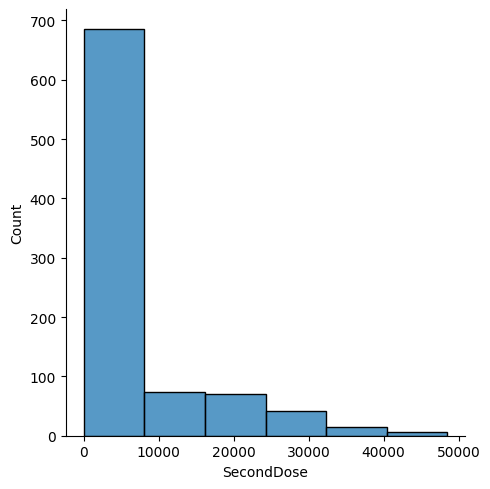

In [ ]:
sns.displot(pd1, x="SecondDose", bins=6)

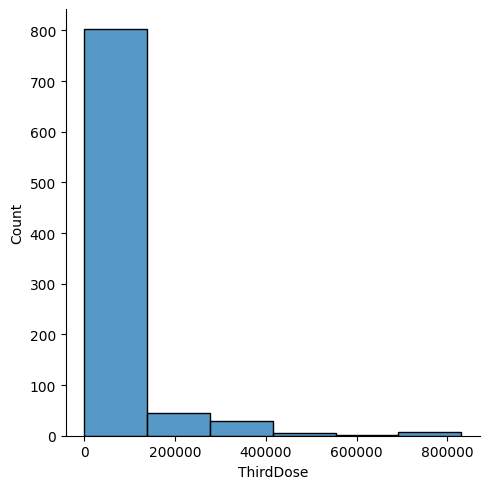

In [ ]:
sns.displot(pd1, x="ThirdDose", bins=6)

### **3.2) Visualising the relationship of a pair of continuous variables.**

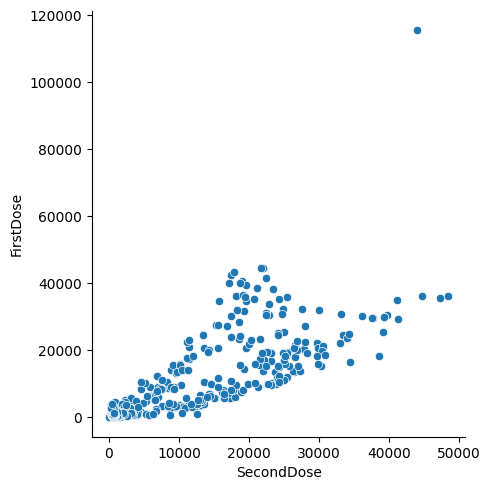

In [ ]:
sns.relplot(data=pd1, x="SecondDose", y="FirstDose")

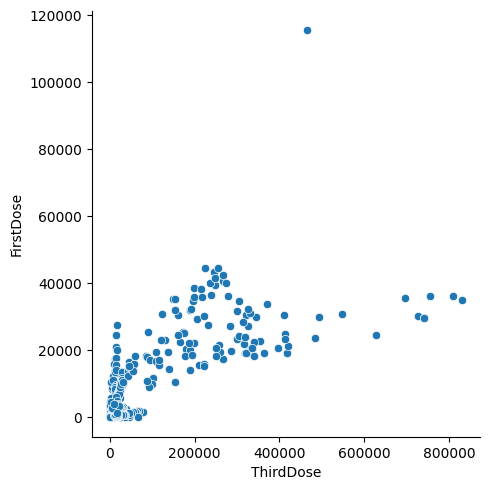

In [ ]:
sns.relplot(data=pd1, x="ThirdDose", y="FirstDose")

### **3.3) Visualising the association b/w a categorical variable and a continuous one.**

<Axes: xlabel='WorkingDay', ylabel='FirstDose'>

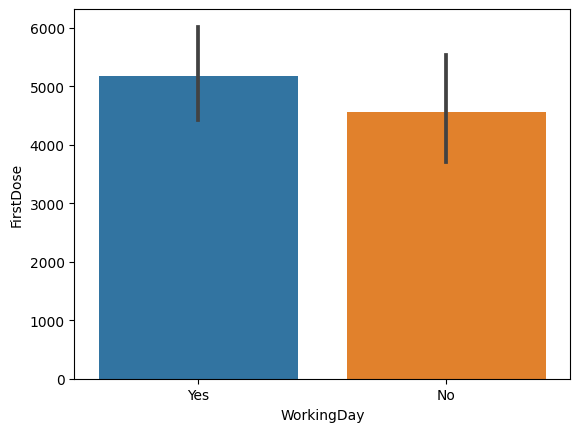

In [ ]:
sns.barplot(data=pd1, x="WorkingDay", y="FirstDose")

### **3.4) Visualising the relationship between more than two variables, e.g., using semantic mappings**

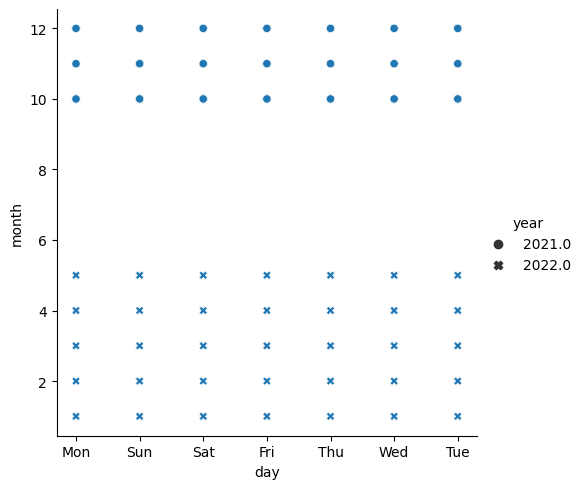

In [ ]:
sns.relplot(data=pd1, x="day", y="month", style="year")

### **3.5) Visualising the unique values of a categorical variable and their frequencies.**

In [ ]:
pd2 = pd1.areaCode.value_counts()
pd2

E92000001    235
N92000002    233
S92000003    218
W92000004    204
Name: areaCode, dtype: int64

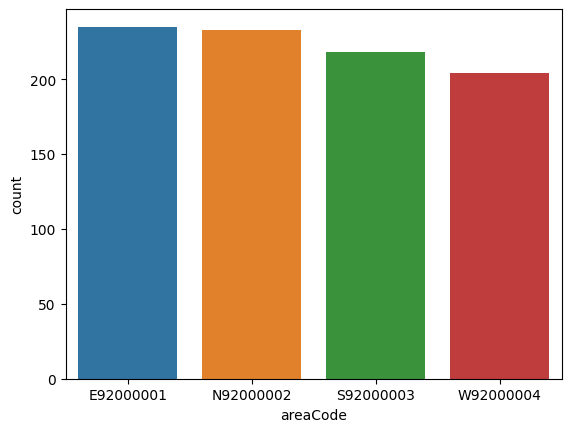

In [ ]:
ac = sns.countplot(x='areaCode', data=pd1, order=pd1['areaCode'].value_counts().index)
